<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/OpenML_dataset_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Naural Network

OpemML dataset. 

Goal : Visualizing MLP Weights


[Open ML](https://www.openml.org) has a database of large datasets that can be used for a variety of machine learning problems. Scikit-learn has a function `fetch_openml` for directly downloading datasets from the Open ML database. 

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

We use a version from Open ML that has 784 pixels (28 x 28).
The feature values range from 0 to 255 (which we interpret on a gray scale with 0 being white and 255 being black). 

The target values are the numbers 0-9. Note that the target values are stored as strings and not integers.


In [3]:
print(X.shape, y.shape)

print(np.min(X), np.max(X))

print(y[0:5])


(70000, 784) (70000,)
0.0 255.0
['5' '0' '4' '1' '9']



This model will use only the digits 0-3, so we can use the following code to segment out that portion of the dataset.

In [4]:
X3 = X[y <= '3']

y3 = y[y <= '3']

Since the goal is to visualize the weights of the hidden layer, we will use only 6 nodes in the hidden layer so that we can look at all of them. We will use `sgd` (stochastic gradient descent) as our solver which requires us to decrease `alpha` (the learning rate).*italicized text*

In [5]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,), max_iter=200, alpha=1e-4, solver='sgd', random_state=2)

mlp.fit(X3, y3)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [6]:
print(mlp.coefs_)

# The elements in the list correspond to the layers: the hidden layer and the output layer. 
print(len(mlp.coefs_))

[array([[-0.01115575, -0.08262854,  0.00865591, -0.01127296, -0.01387947,
        -0.02957174],
       [-0.05147818,  0.0207883 , -0.03491913, -0.04064077,  0.02111298,
         0.00507931],
       [-0.06369078,  0.00236659, -0.05500046,  0.0497324 ,  0.06169602,
        -0.00100449],
       ...,
       [ 0.03318823,  0.03072627,  0.04947788, -0.07696042, -0.02204155,
        -0.00295475],
       [ 0.03754548,  0.02460184,  0.03225107,  0.04285346, -0.07510661,
        -0.05427416],
       [-0.06503772, -0.07023683, -0.02863245, -0.01949495,  0.07608979,
        -0.05707046]]), array([[ 0.16384742, -2.14555656,  0.13976646,  0.98950216],
       [-0.03474033, -0.21458481, -0.31142723,  0.89648366],
       [-2.56161615, -0.46390046,  1.5514097 ,  1.35598971],
       [ 1.32292722, -2.67019227,  0.18579904, -0.01939295],
       [ 0.72234244, -0.71707787,  0.03996007, -1.28525007],
       [ 0.1311403 ,  0.09796007, -0.78005923, -0.21693195]])]
2


Let’s look at the shape of the coefficients for the hidden layer.

In [7]:
print(mlp.coefs_[0].shape)


(784, 6)


There is a 2-dimensional array of size 784 x 6. There are 6 nodes and 784 input values feeding into each node, and we have a weight for each of these connections. 

In order to interpret the values, we will need to use a visual representation.
In matplotlib we can use the subplots function to create multiple plots within a single plot.

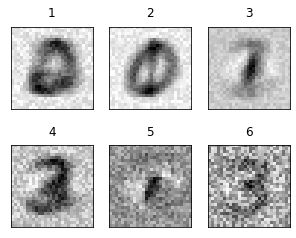

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)

plt.show()

We can see that nodes 4 and 6 are determining if the digit is a 3. Node 1 is determining if the digit is a 0 or a 2 since you can see both of those values in the image. Not every hidden node will have an obvious use. 